### Generative

In [ ]:

import pandas as pd
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

ts = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
data = ts.values

# n is number of days for which we have data on case numbers
# First four fields of each row in csv file are geographical metadata
n = np.size(data,1) - 4

# t will be the horizontal axis for many of the following time series plots
t = np.arange(n)

[10708. 10718. 10728. 10738. 10752. 10761. 10765. 10774. 10780. 10793.
 10801. 10804. 10806. 10810. 10822. 10840.]
15
beta = [ 0.14276971 -0.23811195 -0.03713844  0.0149412   0.13824934  0.07861864
  0.13038511 -0.38028479  0.19772132  0.07547231 -0.16140648  0.17794552
 -0.42949939  0.05408535 -0.43501847  1.67139475]
RMS =  [71.45854389]


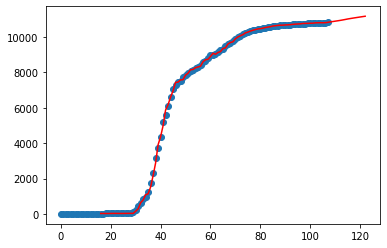

In [ ]:

southk = np.where(data == "Korea, South")
sk = data[southk[0]]

ysk = sk[0][4:]


temps = np.array(ysk, dtype='float')

N = len(temps)

M = 16

x2 = range(M,123)

# Observation vector y is just all observations except first M

# once you have your initial predict matrix, intitial 
y = temps[M:]

X = temps[0:N-M]
for i in range(M-1):
  X = np.column_stack((X, temps[i+1:N-M+i+1]))

sol = npl.lstsq(X, y, rcond=None)

pre = temps[-M:]
print(pre)

# The predict part
for i in range(15):
  theta = sol[0]
  yhat = pre @ theta
  #print("yhat", yhat)
  pre = list(pre)
  pre.pop(0)
  pre.append(yhat)
pre.pop(0)

print(len(pre))
beta = sol[0]
SSE = sol[1]


l = list(X @ beta)
total = l + pre
plt.scatter(np.arange(N), temps)
plt.plot(x2, total, color='red')

print("beta =", beta)
print("RMS = ", np.sqrt(SSE/len(y)))


# DO NOT MODIFY #
plt.show()
# DO NOT MODIFY #
plt.show()




### Classification

In [ ]:
### DO NOT MODIFY ###
%matplotlib notebook
import csv
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def import_mnist(filepath):

    with open(filepath, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        raw_data = np.array(list(reader)).astype(np.float)
    
    # first column are the labels, rest is the data
    y = raw_data[:,0]
    X = raw_data[:,1:]

    return X, y

### END DO NOT MODIFY ###

def preprocess_mnist(X):

    
    X = X - np.tile(np.mean(X, axis=0), (X.shape[0],1))
    X = X / np.tile(np.std(X, axis=0), (X.shape[0],1))
    X = np.nan_to_num(X)

    return X
    

### DO NOT MODIFY IF USING COLAB ###
DATAPATH = "sample_data/mnist_train_small.csv"
        

X, y = import_mnist(DATAPATH)
Xp = preprocess_mnist(X)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
def PCA(X):

    ### Calculate the SVD of X here.
    U, SIG, V = np.linalg.svd(X, full_matrices=True)


    v_p = V[:3].T
    proj = X.dot(v_p)

    return proj


X_reduced = PCA(Xp)


In [ ]:
### DO NOT MODIFY ###

def post(X, y):

    import pandas as pd
    output = np.concatenate((X, np.vstack(y).astype(str)), axis=1)
    df = pd.DataFrame(output, columns=['x', 'y', 'z', 'digit'])
    
    return df


### DO NOT MODIFY ###
Xdf = post(X_reduced, y)



In [ ]:
### DO NOT MODIFY ANYTHING IN THIS CELL ###
### IF YOU HAVE ISSUES WITH KERAS INSTALLATION, ASK ON PIAZZA ###
def train_and_extract(X, y):
    import keras
    from keras.models import Sequential, Model
    from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
    from keras import backend as K

    # y to one-hot
    y_categorical = keras.utils.to_categorical(y, 10)

    # X to 2D
    X2D = X.reshape((20000, 28, 28, 1))

    # model arch

    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3,3), activation='relu', name='conv1', input_shape=(28,28,1)))
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', name='conv2'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', name='fc1'))
    model.add(Dense(10, activation='softmax', name='fc2'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy']
                  )

    model.fit(X2D, y_categorical,
              batch_size=128,
              epochs=5,
              verbose=1)

    extractor = Model(inputs=model.input, outputs=model.get_layer('fc1').output)

    features = extractor.predict(X2D)
    return features

feats = train_and_extract(Xp, y)
print("extracted features shape:", feats.shape)


Using TensorFlow backend.


Epoch 1/5
20000/20000 [==============================] - 20s 1ms/step - loss: 0.3071 - accuracy: 0.9115
Epoch 2/5
20000/20000 [==============================] - 20s 1ms/step - loss: 0.0801 - accuracy: 0.9757
Epoch 3/5
20000/20000 [==============================] - 20s 996us/step - loss: 0.0467 - accuracy: 0.9860
Epoch 4/5
20000/20000 [==============================] - 20s 997us/step - loss: 0.0289 - accuracy: 0.9908
Epoch 5/5
20000/20000 [==============================] - 20s 997us/step - loss: 0.0201 - accuracy: 0.9940
extracted features shape: (20000, 128)


In [ ]:
def PCA_plot(Xs):
    """ Given the output from split, plot it in 3D.
    You will need to use the 'x', 'y', 'z', and 'color' kwargs in px.scatter_3d()

    Returns:
    None.
    """
    import plotly.express as px

    ### YOUR 2c CODE GOES HERE ###
    # We implemented this function in 2 lines.

    fig = px.scatter_3d(x = Xs['x'], y = Xs['y'], z =Xs['z'], color=Xs['digit'])
    fig.show()
    
feat_pre = preprocess_mnist(feats)
feats_reduced = PCA(feat_pre)
feats_df = post(feats_reduced, y)
PCA_plot(feats_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
